In [1]:
import pandas as pd
import numpy as np 
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import mannwhitneyu 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Read dataframes
df = pd.read_csv('data/gender_submission.csv') 
test = pd.read_csv('data/test.csv') 
train = pd.read_csv('data/train.csv')

<AxesSubplot: >

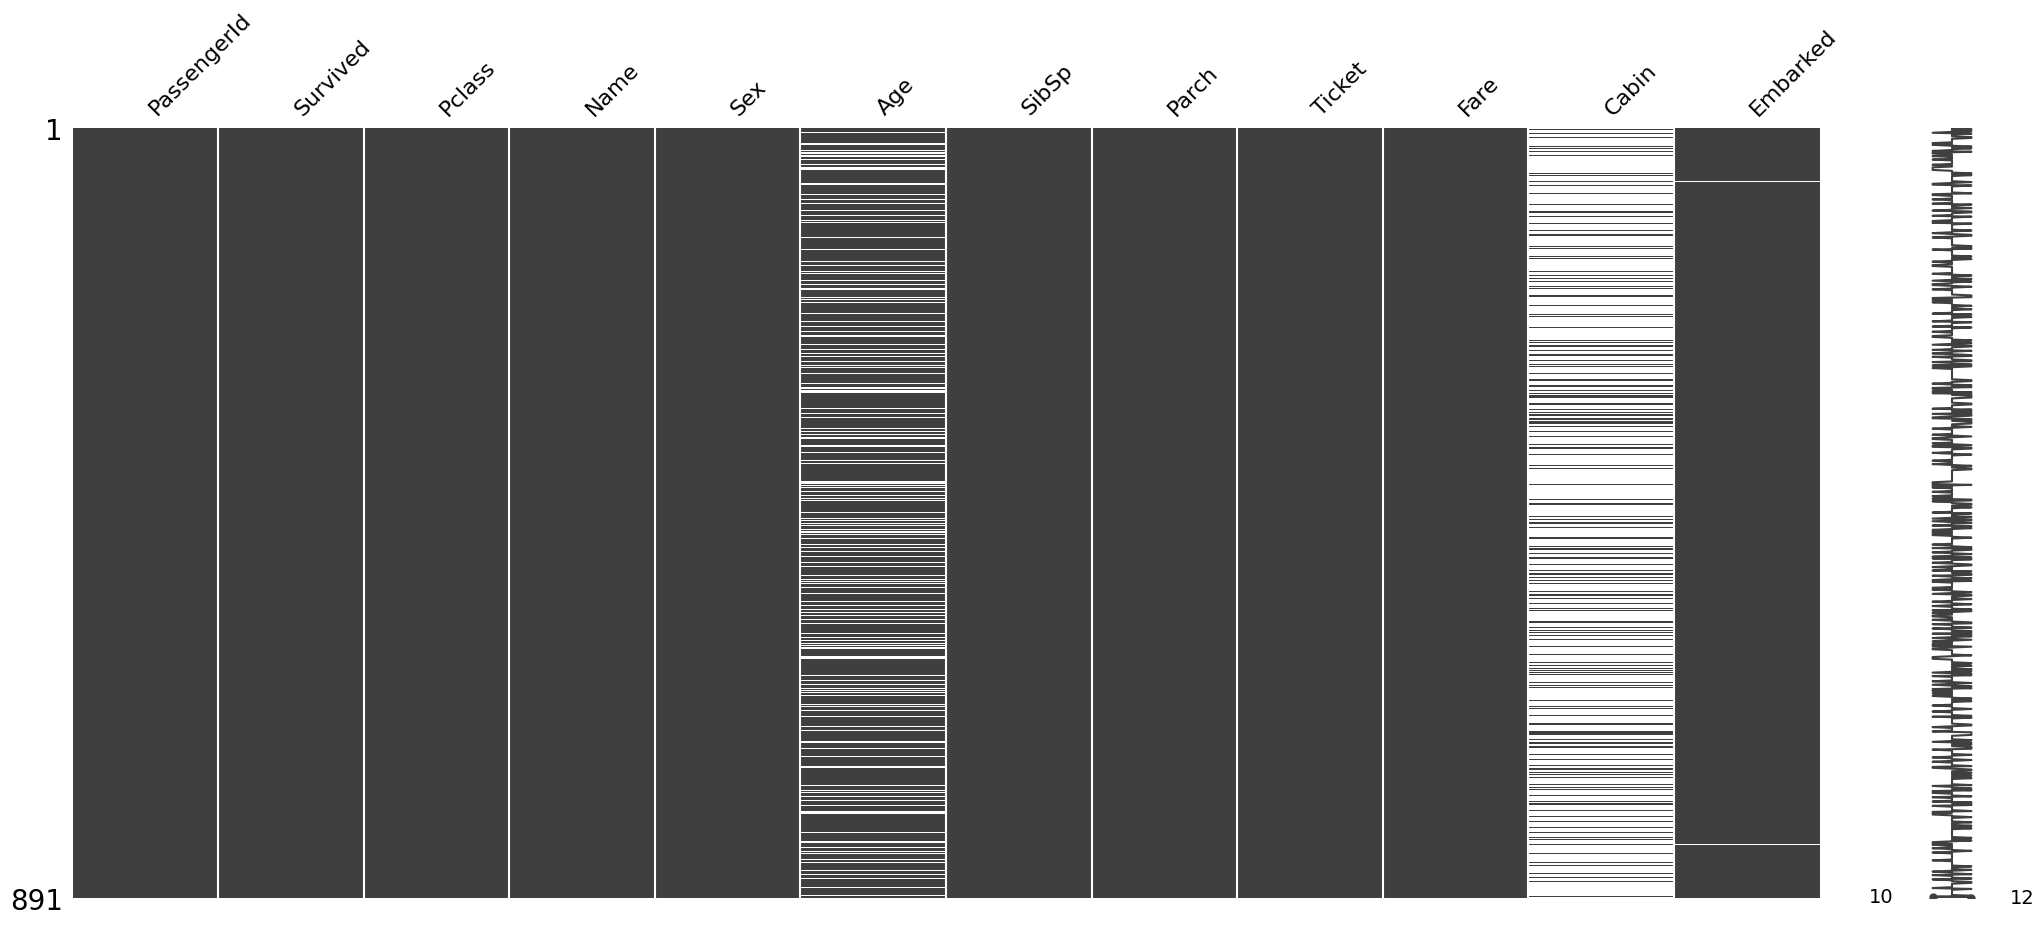

In [3]:
# Train dataframe data quality
msno.matrix(train)


<AxesSubplot: >

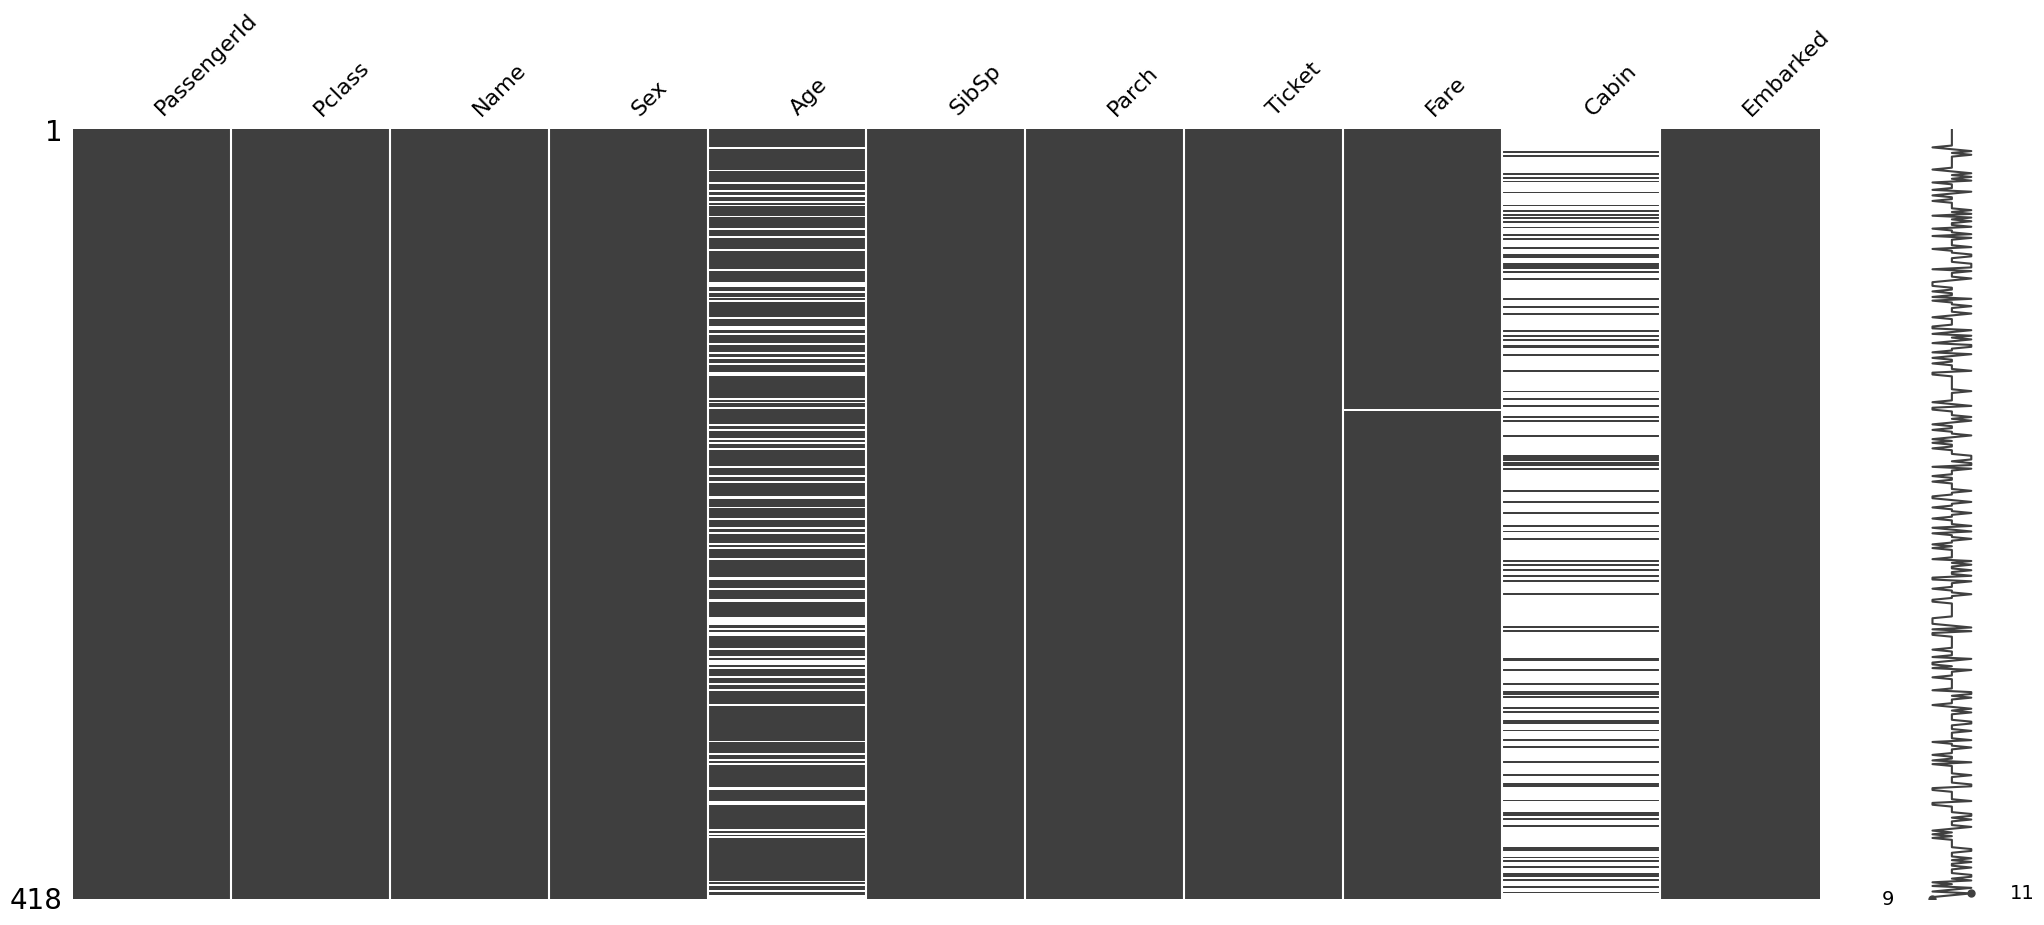

In [4]:
# Test dataframe data quality
msno.matrix(test)

In [5]:
# Add PassengerID, Survived into test df. PassengerId Map 
y = test.merge(df,on='PassengerId', how = 'right')

In [6]:
# Concat test and train df's
df = train.append(y)

/var/folders/f0/k2r595hd0glb8dn292r0zwdm0000gn/T/ipykernel_43886/864563054.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(y)


In [7]:

df.groupby('Sex')['PassengerId'].count()

Sex
female    466
male      843
Name: PassengerId, dtype: int64

In [8]:
df.groupby('Pclass')['PassengerId'].count()

Pclass
1    323
2    277
3    709
Name: PassengerId, dtype: int64

In [9]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [10]:
df[df.Age==0.17]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
354,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,NaN,S


In [11]:
df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [12]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [13]:
df.SibSp.describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

In [14]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

In [15]:
df.Parch.describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

In [16]:
men, women = df[df.Sex == "male"], df[df.Sex == "female"]

In [17]:
stat, p = mannwhitneyu(men.Age, women.Age)

In [18]:
alpha = 0.1
if p > alpha:
  print('Возраст не отличался')
else:
  print('Действительно разный возраст, мужчины ', 
        men.Age.mean(),', женщины ', women.Age.mean())

Действительно разный возраст, мужчины  30.58522796352584 , женщины  28.68708762886598


In [19]:
stat, p = mannwhitneyu(men.Fare, women.Fare)
print('Критерий значимости = %.3f' % (p))
alpha = 0.1
if p > alpha:
  print('Возраст не отличался')
else: 
  print('Действительно разный тариф, мужчины ',
        men.Fare.mean(),', женщины ', women.Fare.mean())

Критерий значимости = nan
Действительно разный тариф, мужчины  26.15460083135392 , женщины  46.1980965665236


In [20]:
df.Age = df.Age.fillna(df.Age.mean())
# df = df.dropna()
df.Age.describe()

count    1309.000000
mean       29.881138
std        12.883193
min         0.170000
25%        22.000000
50%        29.881138
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [21]:
df = df.drop(labels=['Cabin','Name','Ticket'], axis=1)

In [22]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

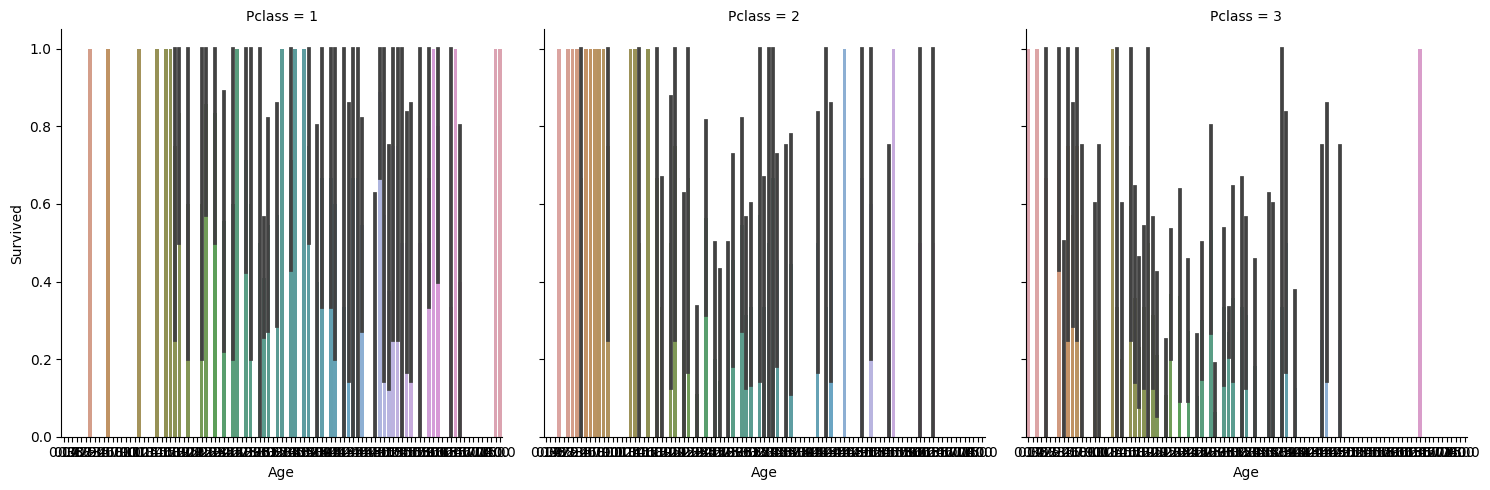

In [23]:
sns.catplot(data = df,y='Survived',x='Age',col='Pclass',
            kind='bar', saturation=0.5)

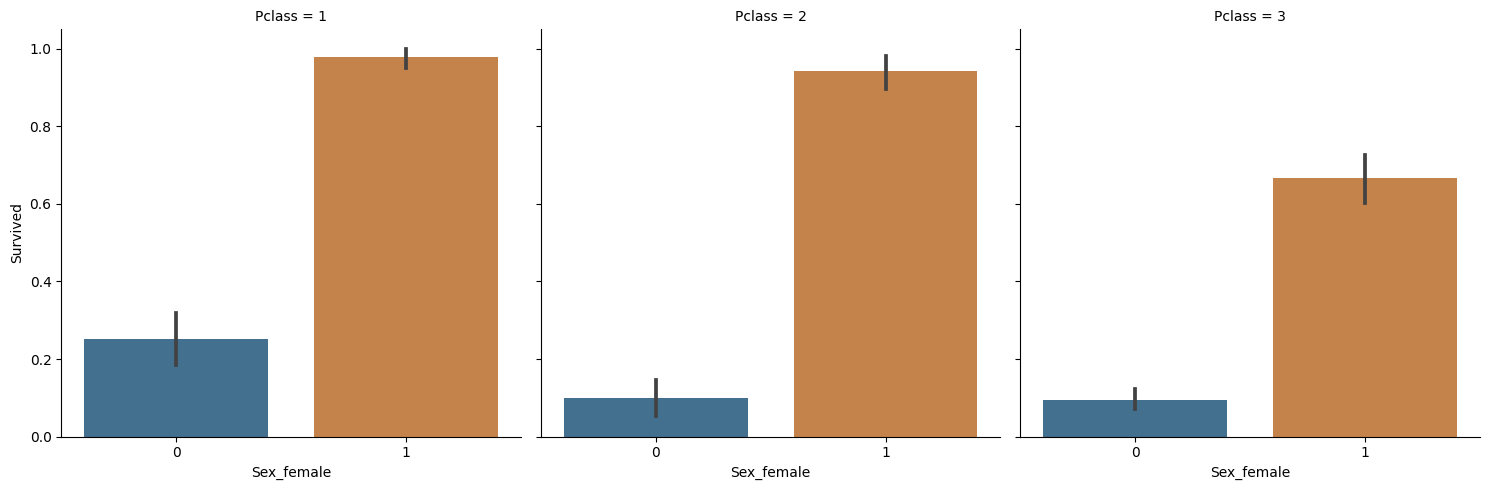

In [24]:
sns.catplot(data = df,y='Survived',x='Sex_female',col='Pclass',
            kind='bar', saturation=0.5)

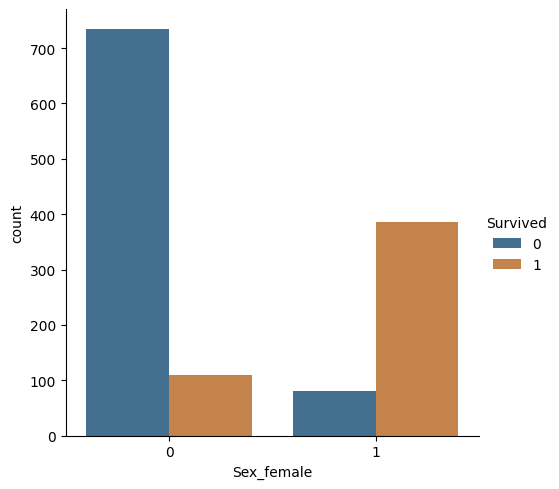

In [25]:
sns.catplot(data = df,hue = 'Survived', x = 'Sex_female',
            kind='count', saturation=0.5)

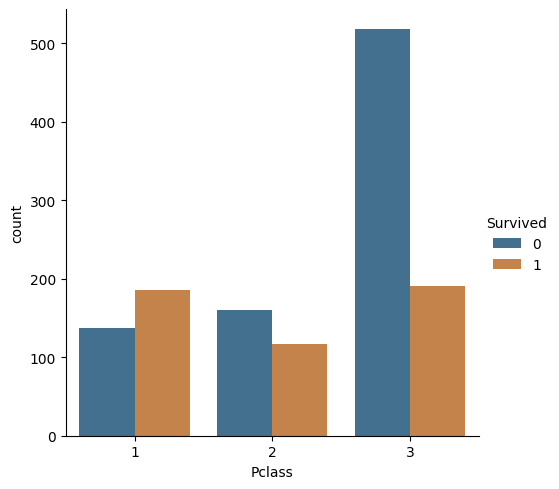

In [26]:
sns.catplot(data = df,hue = 'Survived', x = 'Pclass',
            kind='count', saturation=0.5)

<AxesSubplot: >

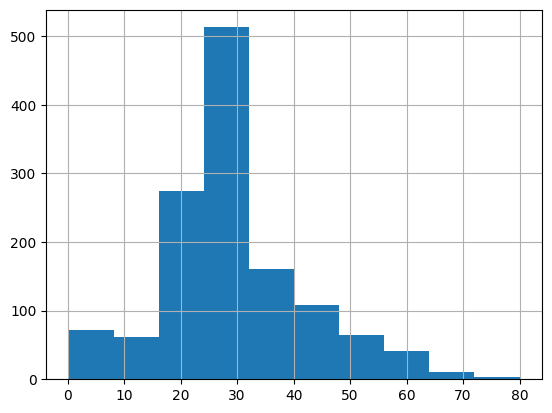

In [27]:
df.Age.hist()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '(0.169, 18.0]'),
  Text(1, 0, '(18.0, 24.0]'),
  Text(2, 0, '(24.0, 29.0]'),
  Text(3, 0, '(29.0, 29.881]'),
  Text(4, 0, '(29.881, 33.0]'),
  Text(5, 0, '(33.0, 43.0]'),
  Text(6, 0, '(43.0, 80.0]')])

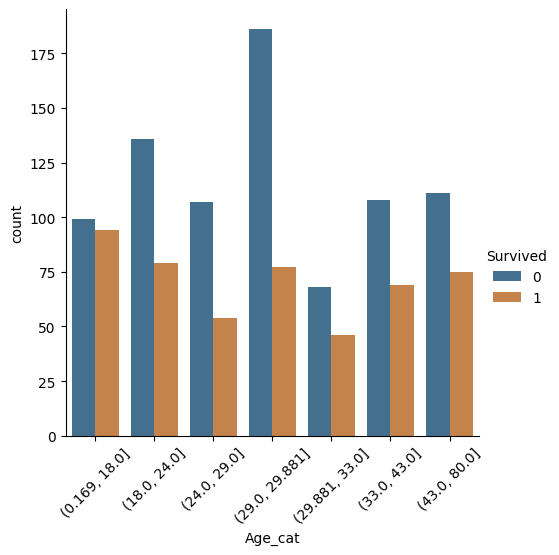

In [28]:
df['Age_cat'] = pd.qcut(df.Age,7)
sns.catplot(data = df,hue = 'Survived', x = 'Age_cat',
            kind='count', saturation=0.5)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '(0.169, 18.0]'),
  Text(1, 0, '(18.0, 24.0]'),
  Text(2, 0, '(24.0, 29.0]'),
  Text(3, 0, '(29.0, 29.881]'),
  Text(4, 0, '(29.881, 33.0]'),
  Text(5, 0, '(33.0, 43.0]'),
  Text(6, 0, '(43.0, 80.0]')])

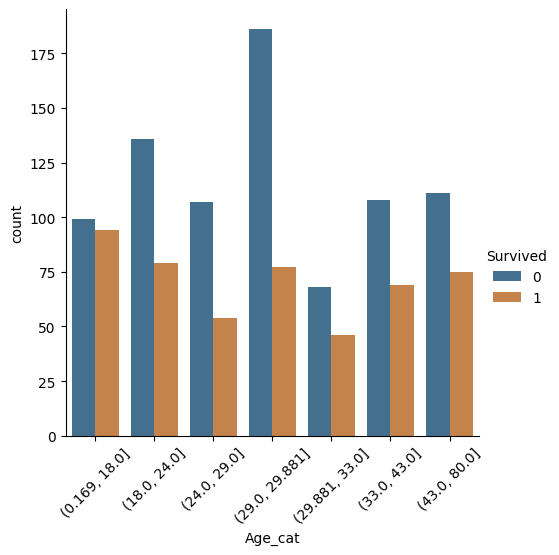

In [29]:
df['Age_cat'] = pd.qcut(df.Age,7)
sns.catplot(data = df,hue = 'Survived', x = 'Age_cat',
            kind='count', saturation=0.5)
plt.xticks(rotation=45)

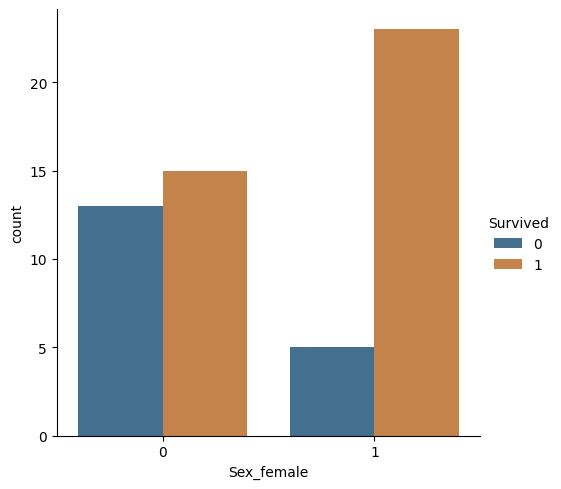

In [30]:
child= df[df.Age<6]
sns.catplot(data = child,hue = 'Survived', 
            x = 'Sex_female',kind='count', saturation=0.5)

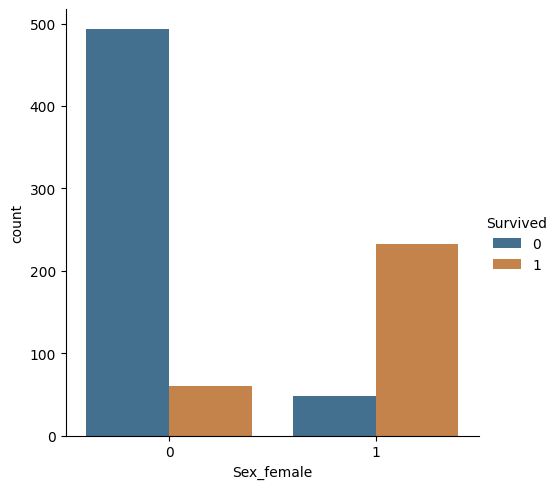

In [31]:
guys = df[(df.Age>=18) & (df.Age<=35)]
sns.catplot(data = guys,hue = 'Survived', 
            x = 'Sex_female',kind='count', saturation=0.5)

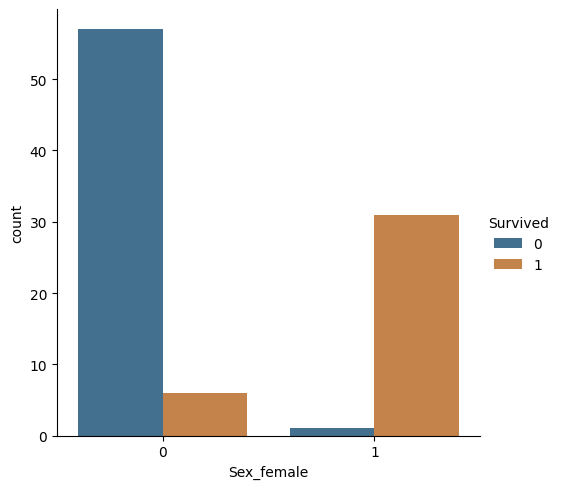

In [32]:
grand = df[df.Age>50]
sns.catplot(data = grand,hue = 'Survived', 
            x = 'Sex_female',kind='count', saturation=0.5)

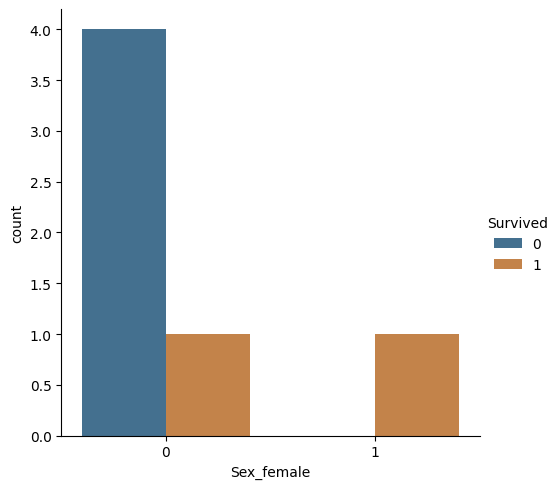

In [33]:
grand = df[df.Age>70]
sns.catplot(data = grand,hue = 'Survived', 
            x = 'Sex_female',kind='count', saturation=0.5)

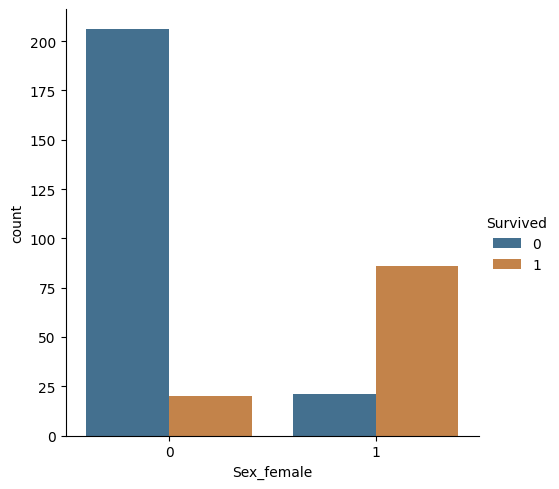

In [34]:
h = df[(df.Age>=29)&(df.Age<=30)]
sns.catplot(data = h,hue = 'Survived',
            x = 'Sex_female',kind='count', saturation=0.5)

In [35]:
df = df.drop('Age_cat', axis=1)
df['family'] = df['Parch'] + df['SibSp']

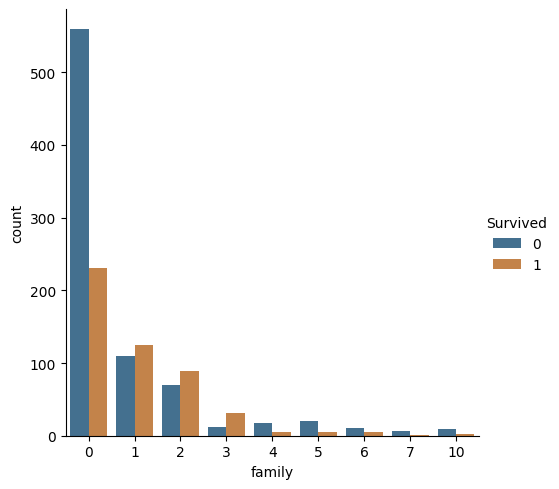

In [36]:
sns.catplot(data = df,hue = 'Survived', x = 'family',
            kind='count', saturation=0.5)

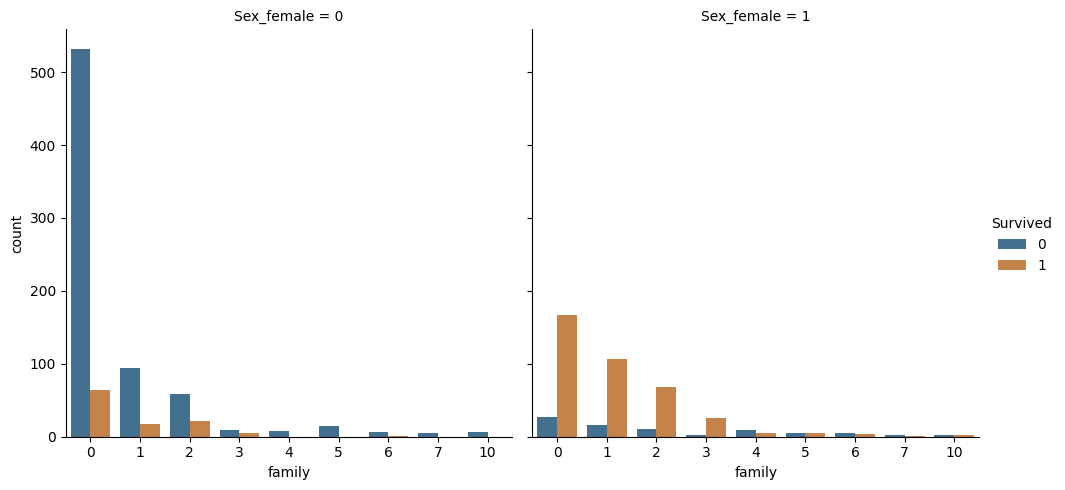

In [37]:
sns.catplot(data = df,hue = 'Survived', x = 'family',
            col = 'Sex_female',kind='count', saturation=0.5)

In [38]:
df['result'] = 1
df.loc[(df.Sex_male == 1)&(df.Pclass == 3), 'result'] = 0
df.loc[(df.Sex_male == 1)&(df.Age > 50), 'result'] = 0
df.loc[df['family']>3, 'result'] = 0

In [39]:
df['errors'] = (df.Survived - df.result)**2
1 - df.errors.sum() / df.shape[0]

0.7203972498090145

In [40]:
df.loc[(df.Sex_male == 1)&(df.Age >=29)&(df.Age <=39), 'result'] = 0
df['errors'] = (df.Survived - df.result)**2
1 - df.errors.sum() / df.shape[0]

0.7815126050420168

In [41]:
df['alive'] = 0
df.loc[(df.Sex_female == 1)&((df.Pclass == 1)&
                             (df.Pclass == 2)), 'alive'] = 1
df.loc[df.Age < 6, 'alive'] = 1
df.loc[(df.Sex_female == 1)&
       (df['family'] < 2), 'alive'] = 1
df.loc[(df.Sex_male == 1)& (df['family'] < 2)&
       (df.Pclass == 1), 'alive'] = 1

In [42]:
df['errors_2'] = (df.Survived - df.alive)**2
1 - df.errors_2.sum() / df.shape[0]

0.7524828113063406

In [43]:
df=pd.get_dummies(df, columns=['Pclass'])

In [44]:
df=df.drop(columns=['family', 'result', 'errors', 'alive', 'errors_2'])

In [45]:
df['Age']=df['Age']/df.Age.max()

In [46]:
df['Fare']=df['Fare']/df.Fare.max()
df['SibSp']=df['SibSp']/df.SibSp.max()
df['Parch']=df['Parch']/df.Parch.max()

In [47]:
train_df, test_df = np.split(df, [int(.7*len(df))])

In [48]:
train_df.columns
train_df = train_df.dropna()

In [49]:
features = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3']
y = train_df['Survived']
X = train_df[features]

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=1)
model.fit(X, y)

RandomForestClassifier(max_depth=1, random_state=1)

In [56]:
test_df = test_df.dropna()
X_test = test_df[features]
test_df.shape

(392, 14)

In [57]:
prediction = model.predict(X_test)

In [58]:
output_df = pd.DataFrame({'PassengerId':test_df.PassengerId, 'Prediction_survived':prediction, 'Real_survived':test_df.Survived})

In [59]:
output_df['errors'] = (output_df.Real_survived - output_df.Prediction_survived)**2
1 - output_df.errors.sum() / output_df.shape[0]

1.0